<h1> Summary</h1>
<br>
The primary purpose of this analysis is to identify patterns in user behavior related to Mobile app survey. Following the analysis, we created 6 cluster groups and PCA groupings to explain the population.

1. Cluster 1 excels at technology. As a result, they target apps via video adverts on sites like YouTube.
2. Cluster 2 places a greater emphasis on content rather than pricing and targeting apps such as restaurant reservations.
3. Cluster 5 consumers are technologically illiterate. People in their old age are classified differently than those in their youthful and middle ages. They are unconcerned with current trends and technologies.

Numbers of clusters as defined below <br>
Luxury_shopper: Cluster 1 <br>
Practical_shopper: Cluster 2 <br>
Leader: Cluster 3<br>
Technology_overwhelmed: Cluster 4<br>
Technology_overwhelmed: Cluster 5<br>


#  Importing the necessary libraries to do the analysis
The following project has the purpose to help us analyze the consumer behavior according to the downloads of apps.
We created 6 different groups/clusters to help us identify them easily. 

In [1]:
########################################
# importing packages
########################################
import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualization
import sys                      # system-specific parameters and functions


# new libraries
from sklearn.decomposition import PCA            # pca
from sklearn.datasets      import load_digits    # digits dataset
from sklearn.preprocessing import StandardScaler # standard scaler
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from  sklearn.cluster        import KMeans # k-means clustering



########################################
# loading data and setting display options
########################################

# loading data
file = "./Mobile_App_Survey_Data.xlsx"

mobile_df = pd.read_excel (io = file, 
                            sheet_name = 0,
                            header = 0)


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
np.set_printoptions(threshold=sys.maxsize)

########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    #if export == True:
    
        # exporting the plot
        #plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [2]:
#getting the basic analysis description 
mobile_df.describe(include = 'number').round(decimals = 2)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
count,1552.00,1552.00,1552.0,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00
mean,1192.85,4.51,0.5,0.24,0.36,0.2,0.06,0.09,0.04,0.19,0.04,0.0,0.69,0.19,0.46,0.27,0.76,0.81,0.53,0.47,0.35,0.08,0.02,3.08,4.22,1.41,2.72,3.31,2.44,3.22,1.61,3.41,3.34,2.82,2.70,3.11,2.46,3.16,1.70,2.22,3.24,2.87,1.81,2.07,1.99,3.81,2.05,2.44,1.98,2.37,2.46,2.24,2.27,2.38,4.29,2.12,2.66,2.16,2.18,2.44,2.75,3.02,2.15,3.00,3.00,3.04,3.25,3.28,2.59,2.80,3.86,3.10,3.33,3.32,2.42,3.12,2.55,3.58,1.90,0.5,0.19,0.18,0.15,0.16,1.73,1.85,7.80,1.53
std,712.01,2.40,0.5,0.43,0.48,0.4,0.23,0.28,0.20,0.40,0.19,0.0,0.46,0.39,0.50,0.44,0.42,0.39,0.50,0.50,0.48,0.27,0.13,1.02,1.34,0.88,1.24,1.01,1.18,1.07,0.80,0.96,0.99,1.17,1.18,1.07,1.26,1.54,0.96,1.40,1.57,1.45,1.05,1.10,1.04,1.61,1.09,1.28,1.03,1.12,1.22,1.08,1.10,1.17,1.55,1.05,1.24,1.12,1.14,1.17,1.33,1.51,1.16,1.41,1.33,1.42,1.47,1.46,1.36,1.36,1.76,1.42,1.53,1.42,1.19,1.44,1.28,1.22,0.93,0.5,0.39,0.39,0.35,0.37,1.49,0.36,3.72,0.50
min,1.00,1.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,570.75,2.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,3.00,1.00,1.00,3.00,1.00,2.00,1.00,3.00,3.00,2.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,0.0,0.00,0.00,0.00,0.00,1.00,2.00,5.00,1.00
50%,1144.50,4.00,1.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,3.00,4.00,1.00,3.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,1.00,2.00,3.00,3.00,1.00,2.00,2.00,4.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,5.00,2.00,3.00,2.00,2.00,2.00,3.00,3.00,2.00,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,4.00,2.00,1.0,0.00,0.00,0.00,0.00,1.00,2.00,7.50,2.00
75%,1833.50,6.00,1.0,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,5.00,1.00,4.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,2.00,3.00,4.00,4.00,2.00,3.00,3.00,5.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,6.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,6.00,4.00,4.00,4.00,3.00,4.00,3.00,4.00,2.00,1.0,0.00,0.00,0.00,0.00,2.00,2.00,11.00,2.00
max,2396.00,11.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,6.0

In [3]:
mobile_df.columns

Index(['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12', 'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57'], dtype='object')

# Creating the different DataFrames to start the scaled function 

In [4]:
#psychometric DataFrame
psychometric_df = pd.DataFrame(mobile_df.loc[ : , 'q24r1' : 'q26r17'])

#behaivor DataFrame
behaivor_df = pd.DataFrame(mobile_df.loc[ : , 'q4r1' : 'q13r12'])

#demographic DataDrame
demographic_df = pd.concat([mobile_df.loc[ : , 'q1':'q2r10'], mobile_df.loc[ : , 'q48':'q57']], axis = 1)

In [5]:
# dropping demographic information
psychometric_behavior = mobile_df.drop(['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 
                                        'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 
                                        'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 
                                        'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 
                                        'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 
                                        'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12', 
                                        'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5',
                                        'q54', 'q55', 'q56', 'q57'],
                                     axis = 1)


# applying the unsupervised_scaler function
psychometric_scaled = unsupervised_scaler(df = psychometric_behavior)
                                      



# checking pre- and post-scaling variance
print(np.var(psychometric_behavior), '\n\n')
print(np.var(psychometric_scaled))

q24r1     2.370016
q24r2     0.917307
q24r3     1.972626
q24r4     2.457613
q24r5     2.089064
q24r6     1.096755
q24r7     1.214049
q24r8     1.079791
q24r9     2.602488
q24r10    1.191352
q24r11    1.634449
q24r12    1.062101
q25r1     1.251600
q25r2     1.494538
q25r3     1.175736
q25r4     1.214625
q25r5     1.364530
q25r6     2.392788
q25r7     1.108724
q25r8     1.536148
q25r9     1.247248
q25r10    1.296109
q25r11    1.364405
q25r12    1.770293
q26r18    2.269049
q26r3     1.338930
q26r4     1.980670
q26r5     1.755799
q26r6     2.008316
q26r7     2.158827
q26r8     2.144740
q26r9     1.834877
q26r10    1.858299
q26r11    3.082074
q26r12    2.017210
q26r13    2.343706
q26r14    2.008552
q26r15    1.408040
q26r16    2.059268
q26r17    1.634263
dtype: float64 


q24r1     1.0
q24r2     1.0
q24r3     1.0
q24r4     1.0
q24r5     1.0
q24r6     1.0
q24r7     1.0
q24r8     1.0
q24r9     1.0
q24r10    1.0
q24r11    1.0
q24r12    1.0
q25r1     1.0
q25r2     1.0
q25r3     1.0
q25r4     1.

# Starting PCA and factor loading

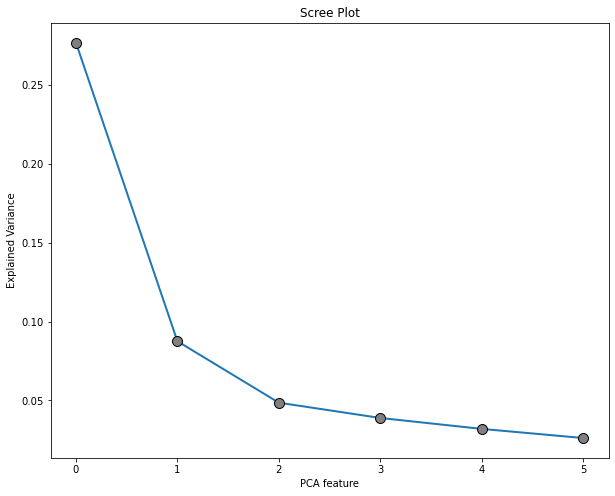

In [6]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 6,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_pca = pca.fit_transform(psychometric_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [7]:
####################
###### PC Model ####
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(psychometric_scaled.columns)

In [8]:
# analyzing factor strengths per customer
factor_loadings = pca.transform(psychometric_scaled)


# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)


# renaming columns
factor_loadings_df.columns = factor_loadings_df.columns


# checking the results
factor_loadings_df.head(n=5)

,0,1,2,3,4,5
0,6.818315,1.298739,-2.168044,0.998266,0.187044,-0.261464
1,-4.592837,2.425736,0.922741,-1.890122,-0.894754,0.237173
2,6.275900,0.922430,-0.109621,-0.998079,1.248219,-2.136364
3,-2.924366,1.549958,0.384484,-1.963633,0.680874,-0.988950
4,-0.365367,2.356555,0.789370,0.411645,-0.152097,0.143428


## Creating 6 different clusters

In [9]:
# naming each principal component
factor_loadings_df.columns = ['Technology_enthusiast',   # it's up to the technological trends
                               'Technology_overwhelmed', # not such a geek in the technological area
                               'Leader',              #capable of influence in people, strong opinion
                               'Pasive_personality', #neutral personality, not such a risk taker
                               'Luxury_shopper',     #likes to buy the best things
                               'Practical_shopper']      #neutral personality, not such a risk taker


# checking the result
factor_loadings_df.round(decimals = 2)

,Technology_enthusiast,Technology_overwhelmed,Leader,Pasive_personality,Luxury_shopper,Practical_shopper
0,6.82,1.30,-2.17,1.00,0.19,-0.26
1,-4.59,2.43,0.92,-1.89,-0.89,0.24
2,6.28,0.92,-0.11,-1.00,1.25,-2.14
3,-2.92,1.55,0.38,-1.96,0.68,-0.99
4,-0.37,2.36,0.79,0.41,-0.15,0.14
...,...,...,...,...,...,...
1547,-3.58,-0.13,0.29,-0.01,1.72,0.76
1548,-2.57,-0.33,-2.56,1.65,-0.24,0.33
1549,-3.58,1.42,0.62,-1.33,-1.38,0.36
1550,-2.11,-0.01,-1.21,0.52,0.04,-0.78


In [10]:
# checking variance amongst clusters
np.var(factor_loadings_df)

Technology_enthusiast     11.072911
Technology_overwhelmed     3.499891
Leader                     1.941049
Pasive_personality         1.553479
Luxury_shopper             1.276998
Practical_shopper          1.045604
dtype: float64

In [11]:
# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df = factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_scaled))

Technology_enthusiast     11.072911
Technology_overwhelmed     3.499891
Leader                     1.941049
Pasive_personality         1.553479
Luxury_shopper             1.276998
Practical_shopper          1.045604
dtype: float64 


Technology_enthusiast     1.0
Technology_overwhelmed    1.0
Leader                    1.0
Pasive_personality        1.0
Luxury_shopper            1.0
Practical_shopper         1.0
dtype: float64


# Creating a dendrogram for further analyze 

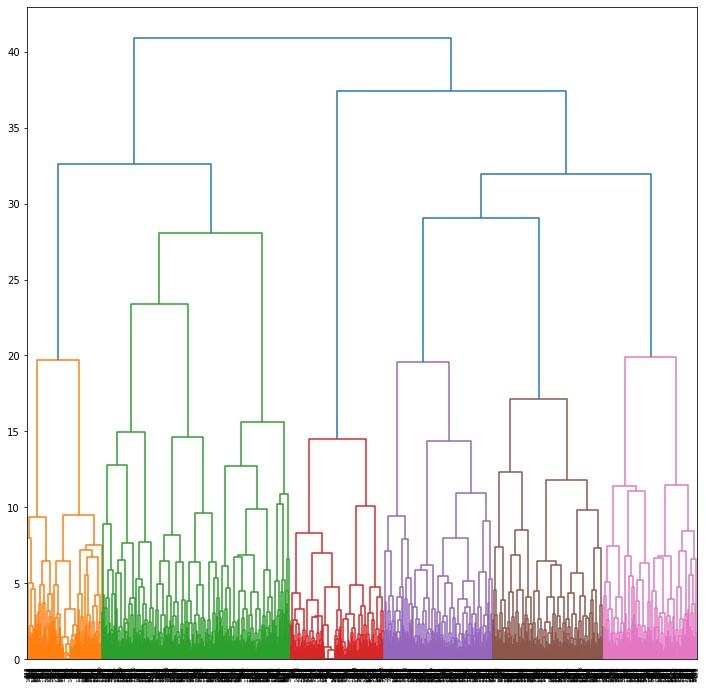

In [12]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

In [13]:
# INSTANTIATING a k-Means object with five clusters
mobile_k_pca = KMeans(n_clusters   = 6,  #10% - 20% of the data should be in the group
                        random_state = 219)


# fitting the object to the data
mobile_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
mobile_kmeans_pca = pd.DataFrame({'Cluster': mobile_k_pca.labels_})


# checking the results
print(mobile_kmeans_pca.iloc[: , 0].value_counts())

3    309
1    289
4    255
0    246
5    231
2    222
Name: Cluster, dtype: int64


In [14]:
# storing cluster centers
centroids_pca = mobile_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Technology_enthusiast',   # it's up to the technological trends
                            'Technology_overwhelmed', # not such a geek in the technological area
                            'Leader',              #capable of influence in people, strong opinion
                            'Pasive_personality', #neutral personality, not such a risk taker
                            'Luxury_shopper',     #likes to buy the best things
                            'Practical_shopper']  #more into the content that the price


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Technology_enthusiast,Technology_overwhelmed,Leader,Pasive_personality,Luxury_shopper,Practical_shopper
0,0.69,-0.05,-0.19,-0.71,0.96,-0.71
1,0.08,-0.15,0.04,0.10,0.57,1.28
2,0.40,-1.05,0.75,-0.33,-0.85,-0.04
3,-0.69,-0.66,-0.70,0.62,0.02,-0.37
4,0.82,1.04,0.05,0.73,-0.50,-0.22
5,-1.20,0.99,0.31,-0.69,-0.40,-0.06


# Getting all the data back together 

In [15]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([mobile_kmeans_pca,
                         factor_loadings_df],
                         axis = 1)

# concatenating demographic and behavioral information with pca-clusters
final_pca_clust_df = pd.concat([mobile_df.loc[ : , ['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 
                                              'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 
                                              'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 
                                              'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 
                                              'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12',
                                              'q48', 'q49','q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 
                                              'q56', 'q57']],
                                clst_pca_df.round(decimals = 2)],
                                axis = 1)
# renaming columns
final_pca_clust_df.columns = ['caseID','Age','iPhone','iPod touch','Android','BlackBerry','Nokia','Windows Phone','HP','Tablet','Other','None','Music App','TV Check','Ent. App','TV Show App','Gaming App','Social Networking App', 'News App','Shopping App','Specific News App','Other Apps','No Apps','Quantity App', 'Free Apps','Facebook','Twitter','Myspace','Pandora radio','Vevo','YouTube','AOL Radio','Last.fm','Yahoo Entertainment and Music','IMBD','LinkedIn','Netflix','Education','Marital Status', 'No Child', 'Children under 6 years old ','Children 6-12 years old','Children 13-17 years old ','Children 18 or older', 'Race', 'Hispanic/Latin', 'Income', 'Gender','Cluster','Technology_enthusiast','Technology_overwhelmed','Leader','Pasive_personality','Luxury_shopper','Practical_shopper']

# show the first 5 rows
final_pca_clust_df.head(n = 5)

,caseID,Age,iPhone,iPod touch,Android,BlackBerry,Nokia,Windows Phone,HP,Tablet,Other,None,Music App,TV Check,Ent. App,TV Show App,Gaming App,Social Networking App,News App,Shopping App,Specific News App,Other Apps,No Apps,Quantity App,Free Apps,Facebook,Twitter,Myspace,Pandora radio,Vevo,YouTube,AOL Radio,Last.fm,Yahoo Entertainment and Music,IMBD,LinkedIn,Netflix,Education,Marital Status,No Child,Children under 6 years old,Children 6-12 years old,Children 13-17 years old,Children 18 or older,Race,Hispanic/Latin,Income,Gender,Cluster,Technology_enthusiast,Technology_overwhelmed,Leader,Pasive_personality,Luxury_shopper,Practical_shopper
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,3,4,1,0,0,0,0,2,2,5,1,4,6.82,1.30,-2.17,1.00,0.19,-0.26
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2,5,1,0,1,1,0,0,3,2,10,2,5,-4.59,2.43,0.92,-1.89,-0.89,0.24
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3,4,4,0,0,0,1,0,2,2,6,1,0,6.28,0.92,-0.11,-1.00,1.25,-2.14
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4,2,1,0,1,1,0,0,1,2,5,1,5,-2.92,1.55,0.38,-1.96,0.68,-0.99
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2,5,2,1,0,0,0,0,3,2,4,2,4,-0.37,2.36,0.79,0.41,-0.15,0.14


In [16]:
#renaiming channels

education = {1: 'Some high school',
             2: 'High school graduate',
             3: 'Some college',
             4: 'College graduate',
             5: 'Some post-graduate studies',
             6: 'Post graduate degree'}

final_pca_clust_df['Education'].replace(education, inplace = True)

marital_status = {1: 'Married',
                  2: 'Single',
                  3: 'Single with a partner',
                  4: 'Separated/Widowed/ Divorced'}
final_pca_clust_df['Marital Status'].replace(marital_status, inplace = True)

race = {1: 'White/Caucasian',
        2: 'Black/African American',
        3: 'Asian',
        4: 'Native Hawaiian/Pacific Islander',
        5: 'American Indian/Alaska Native',
        6: 'Other race'}
final_pca_clust_df['Race'].replace(race, inplace = True)

ethinicity = {1: 'Yes',
              2: 'No'}
final_pca_clust_df['Hispanic/Latin'].replace(ethinicity, inplace = True)

income = {1: 'Under 10k',
          2: '10k-15k[' ,
          3: '15k-20k[',
          4: '20k-30k[',
          5: '30k-40k[',
          6: '40k-50k[',
          7: '50k-60k[',
          8: '60k-70k[',
          9: '70k-80k[',
          10:'80k-90k[',
          11: '90k-100k[',
          12:'100k-125k[',
          13: '125k-150k[',
          14: '>150k'}
final_pca_clust_df['Income'].replace(income, inplace = True)

# renaming regions
cluster_stats = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5',
                 5 : 'Cluster 6'}

final_pca_clust_df['Cluster'].replace(cluster_stats, inplace = True)

data_df = final_pca_clust_df


# checking results
data_df.head(n=10)

,caseID,Age,iPhone,iPod touch,Android,BlackBerry,Nokia,Windows Phone,HP,Tablet,Other,None,Music App,TV Check,Ent. App,TV Show App,Gaming App,Social Networking App,News App,Shopping App,Specific News App,Other Apps,No Apps,Quantity App,Free Apps,Facebook,Twitter,Myspace,Pandora radio,Vevo,YouTube,AOL Radio,Last.fm,Yahoo Entertainment and Music,IMBD,LinkedIn,Netflix,Education,Marital Status,No Child,Children under 6 years old,Children 6-12 years old,Children 13-17 years old,Children 18 or older,Race,Hispanic/Latin,Income,Gender,Cluster,Technology_enthusiast,Technology_overwhelmed,Leader,Pasive_personality,Luxury_shopper,Practical_shopper
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,Some college,Separated/Widowed/ Divorced,1,0,0,0,0,Black/African American,No,30k-40k[,1,Cluster 5,6.82,1.30,-2.17,1.00,0.19,-0.26
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2,Some post-graduate studies,Married,0,1,1,0,0,Asian,No,80k-90k[,2,Cluster 6,-4.59,2.43,0.92,-1.89,-0.89,0.24
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3,College graduate,Separated/Widowed/ Divorced,0,0,0,1,0,Black/African American,No,40k-50k[,1,Cluster 1,6.28,0.92,-0.11,-1.00,1.25,-2.14
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4,High school graduate,Married,0,1,1,0,0,White/Caucasian,No,30k-40k[,1,Cluster 6,-2.92,1.55,0.38,-1.96,0.68,-0.99
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2,Some post-graduate studies,Single,1,0,0,0,0,Asian,No,20k-30k[,2,Cluster 5,-0.37,2.36,0.79,0.41,-0.15,0.14
5,7,9,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,4,4,4,4,4,3,4,4,2,4,4,4,College graduate,Separated/Widowed/ Divorced,0,0,0,1,1,White/Caucasian,No,60k-70k[,1,Cluster 2,2.28,-1.26,3.04,1.96,-0.00,1.23
6,8,11,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,4,5,1,4,2,1,4,2,4,4,4,2,2,1,Some college,Married,0,0,0,0,1,White/Caucasian,No,60k-70k[,2,Cluster 4,-3.02,-0.87,-2.04,0.81,-0.52,0.76
7,9,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,5,5,2,4,2,4,4,2,4,4,2,4,4,4,College graduate,Married,0,0,0,1,1,White/Caucasian,No,90k-100k[,2,Cluster 4,-2.88,-2.96,-0.03,1.26,0.80,-0.65
8,10,6,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,4,6,2,4,3,3,4,2,4,4,4,4,2,3,Post graduate degree,Single,1,0,0,0,0,White/Caucasian,No,80k-90k[,1,Cluster 2,1.80,-0.35,-2.68,1.43,-0.54,1.35
9,11,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,3,6,2,4,4,4,4,3,4,4,4,4,4,4,Some post-graduate studies,Single,1,0,0,0,0,White/Caucasian,No,70k-80k[,2,Cluster 2,0.64,0.53,0.94,1.81,0.82,0.82


# Analyze with Demographics

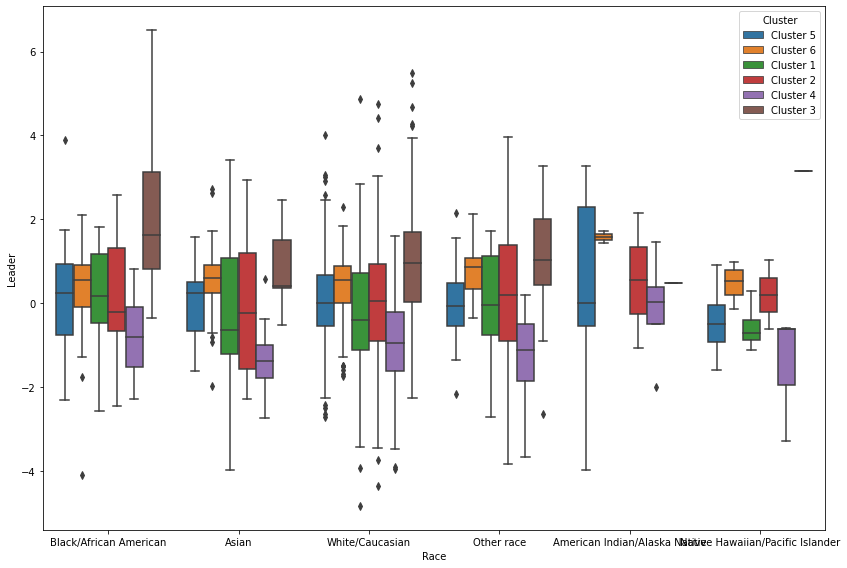

In [17]:
########################
# Race
########################
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Race',
            y = 'Leader',
            hue = 'Cluster',
            data = data_df)
plt.tight_layout()
plt.show()

Above cluster 3 has higher tendency this shows neutral in using the apps. The Black/African American are not showing much interest in new technologies and watching videos.

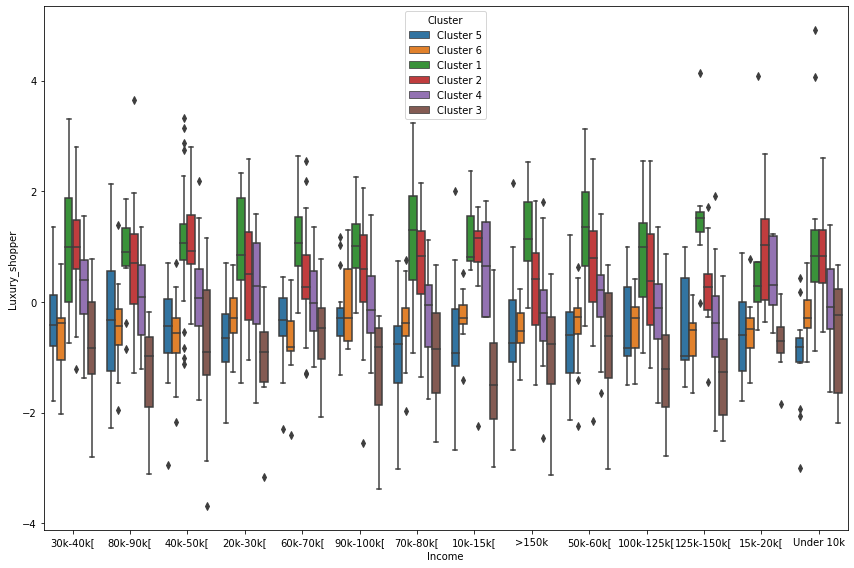

In [18]:
########################
# Income
########################
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Income',
            y = 'Luxury_shopper',
            hue = 'Cluster',
            data = data_df)
plt.tight_layout()
plt.show()

Analyzing the Income vs the Luxury Shopper we can observed cluster number 1 have a higher tendency towards payable apps, that is the the one that stands the most out of the range between 125k -150k of anual income before taxes. At the same time we can observed extreme outsiders under the 10k of anual income, there are a group of people that tend to pay more for apps, but also we can notice that there are some outsiders from cluster 5 that have a negative relations towards buying apps

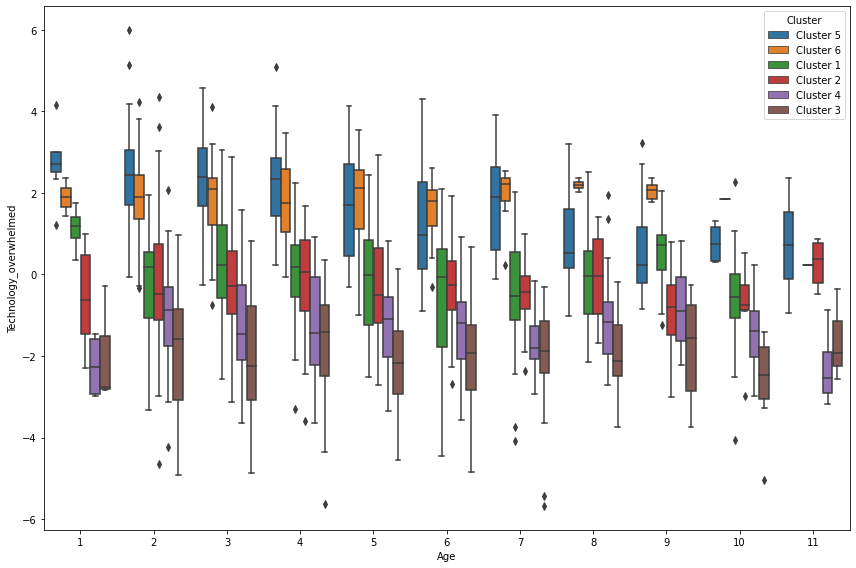

In [19]:
########################
# Age
########################
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age',
            y = 'Technology_overwhelmed',
            hue = 'Cluster',
            data = data_df)
plt.tight_layout()
plt.show()

Clusters 5 and 6 depict persons who are technologically illiterate. They only use apps to consume video material and don't spend much time on them.

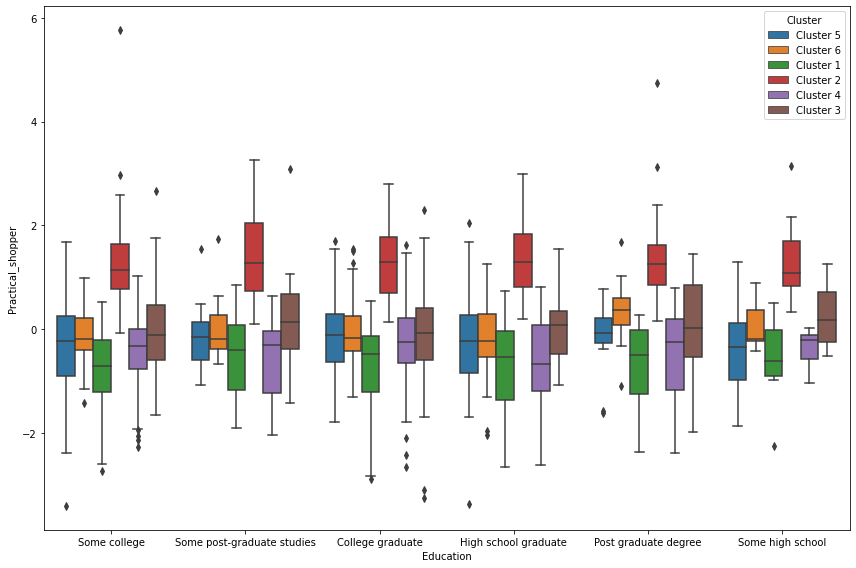

In [20]:
########################
# Education 
########################
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Education',
            y = 'Practical_shopper',
            hue = 'Cluster',
            data = data_df)
plt.tight_layout()
plt.show()

From the box plot shown above we can identify that the most practical shoppers of apps are the one located in cluster 2. Doesn't matter the level of education. Never the less we can identify that people that have some high School Education, are the one that are more practical while choosing their apps

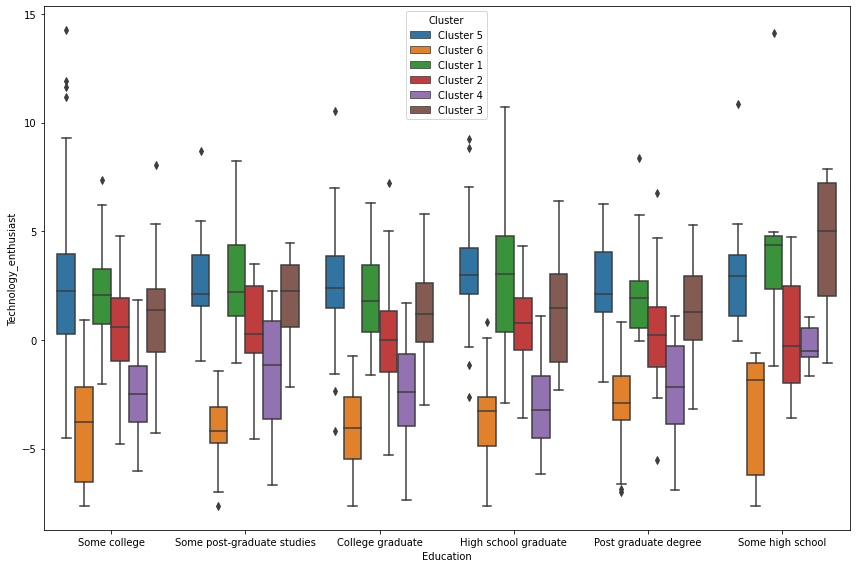

In [21]:
########################
# Education  
########################
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Education',
            y = 'Technology_enthusiast',
            hue = 'Cluster',
            data = data_df)
plt.tight_layout()
plt.show()

From the box plot shown above we can identify that the most practical shoppers of apps identify in cluster 1. Technology  overwhelmed identified most in cluster 5. This shows High school graduates shows interest to use technology.

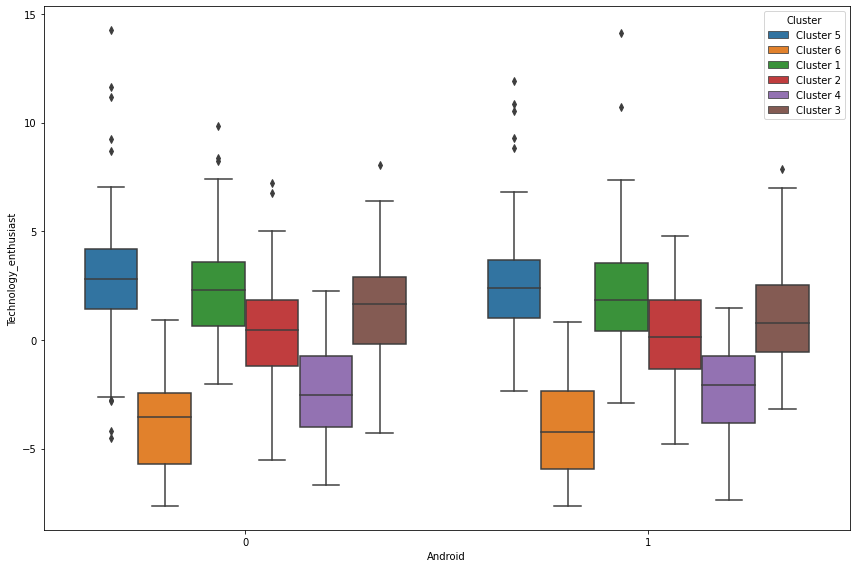

In [22]:
########################
# Android  
########################
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Android',
            y = 'Technology_enthusiast',
            hue = 'Cluster',
            data = data_df)
plt.tight_layout()
plt.show()

According to the above box plot, clusters 1 and 5 have the largest tendency. This demonstrates that Android users spend more time using apps.

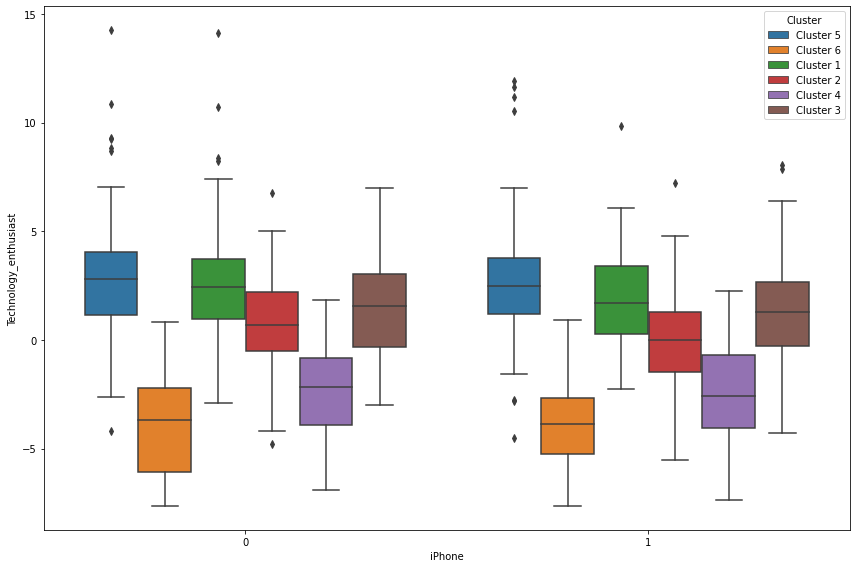

In [23]:
########################
# iPhone  Technology_enthusiast
########################
########################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'iPhone',
            y = 'Technology_enthusiast',
            hue = 'Cluster',
            data = data_df)
plt.tight_layout()
plt.show()

We determined cluster 5 as having the highest propensity based on the above box plot. This demonstrates that iPhone owners spend more time using applications and stay current with technology.

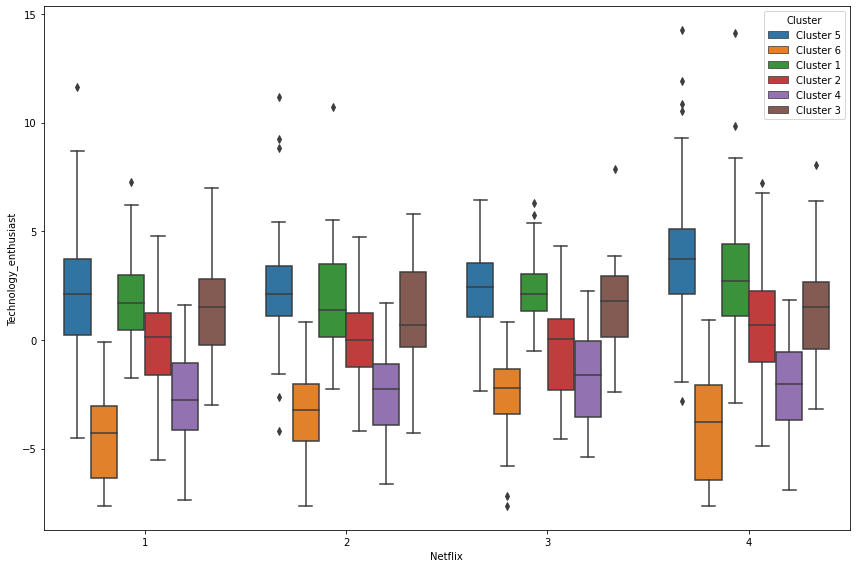

In [24]:
########################
# Netflix
########################
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Netflix',
            y = 'Technology_enthusiast',
            hue = 'Cluster',
            data = data_df)
plt.tight_layout()
plt.show()

According to the above box plot, clusters 1 and 5 have the largest tendency. This demonstrates that Netflix consumers spend more time using applications and stay current with technology.

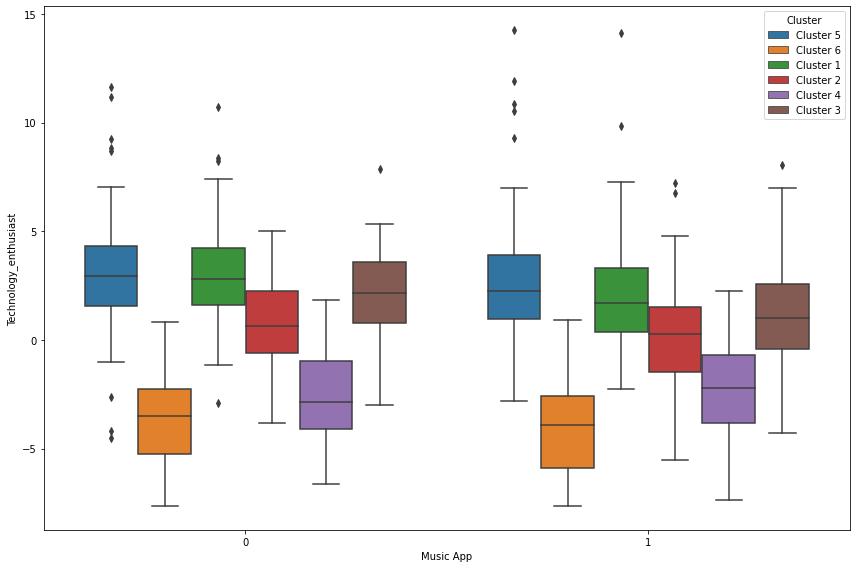

In [25]:
########################
#Music App
########################
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Music App',
            y = 'Technology_enthusiast',
            hue = 'Cluster',
            data = data_df)
plt.tight_layout()
plt.show()

We determined cluster 5 as having the highest propensity based on the above box plot. This demonstrates that music fans spend more time using applications and are technologically savvy.